# **EDA - 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('BIKE DETAILS.csv')

In [5]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [6]:
df.shape

(1061, 7)

In [7]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [10]:
df.ex_showroom_price.replace(np.nan,0)

,ex_showroom_price
0,0.0
1,0.0
2,148114.0
3,89643.0
4,0.0
...,...
1056,52000.0
1057,51000.0
1058,57000.0
1059,58000.0


1) **What is the range of selling prices in the dataset?**

In [11]:
df['selling_price'] = pd.to_numeric(df['selling_price'], errors = 'coerce')
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = range(int(min_price),int(max_price)+1)
price_range

range(5000, 760001)

2) **what is the median selling price in the dataset?**

In [12]:
median_price = df['selling_price'].median()
print(f"{median_price}")

45000.0


3) **what is the most common seller type?**

In [13]:
df['seller_type'].unique()


array(['Individual', 'Dealer'], dtype=object)

In [14]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [15]:
most_common_seller_type = df['seller_type'].mode()[0]
print(f"{most_common_seller_type}")

Individual


4) **How many bikes have driven more than 50,000 kilometers?**



In [17]:
df['km_driven_check'] = pd.to_numeric(df['km_driven'], errors = 'coerce')
df['km_driven_check'] = df['km_driven']>50000
df['km_driven_check'].value_counts()

,count
km_driven_check,
False,891
True,170


5) **What is average km_driven value for each ownership type?**

In [18]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [19]:
df.groupby('owner')["km_driven"].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6) **What proporation of bikes are from the year 2015 or older?**

601 bikes are from the year 2015 or older ,460 is above.

In [20]:
df.groupby('name')['year'].transform(lambda x : x <=2015).value_counts()

,count
year,
True,601
False,460


7) **What is trend of missing values across the dataset?**

To understand the trend of missing values across a dataset, you can analyze the distribution of missing values in each column. This can help you identify whether certain columns have more missing values than others and whether the missing data is randomly distributed or follows a pattern.

Steps to analyze missing values:

Check the count of missing values in each column.

Visualize missing data (optional) to understand the trend more clearly.

Check missing data for specific rows or patterns.

8) **What is the highest ex_showroom_price recorded ,and for which bike?**

In [25]:
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]


In [32]:
max_price = df['ex_showroom_price'].max()
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]
bike_name = max_price_row['name']

In [33]:
print(f"{max_price} recorded for bike : {bike_name}")

1278000.0 recorded for bike : Harley-Davidson Street Bob


9) **What is the total number of bikes listed by each seller type?**

In [37]:
number_of_bikes = df.groupby('seller_type').size()

In [38]:
number_of_bikes = df.groupby('seller_type').size()

10) **What is the relationship between selling_price and km_driven for first owner bikes?**

In [39]:
df = pd.read_csv("/content/BIKE DETAILS.csv")


In [40]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


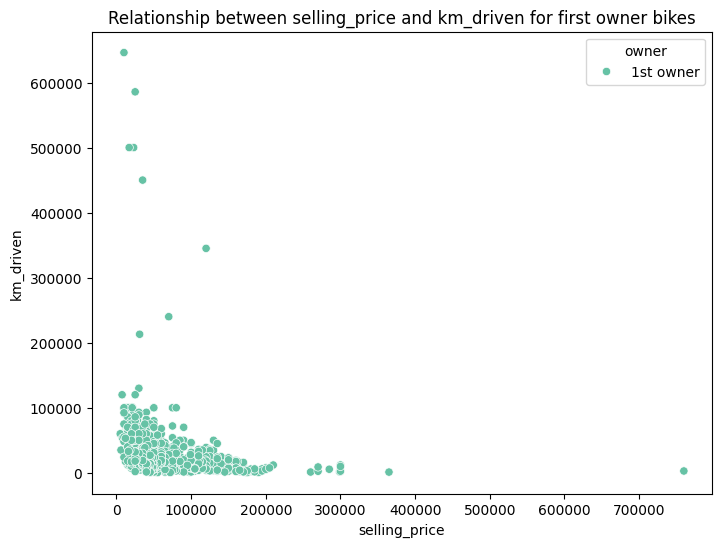

In [41]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'selling_price',y = 'km_driven',data = df[df['owner']=='1st owner'],hue = 'owner',palette = 'Set2')
plt.title("Relationship between selling_price and km_driven for first owner bikes")
plt.show()

11) **Identify and remove outliers in the km_driven for the first owner bikes?**

<ipython-input-42-d1251c1e4373>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'km_driven',data = df[df['owner']== '1st owner'],palette = 'Set2')


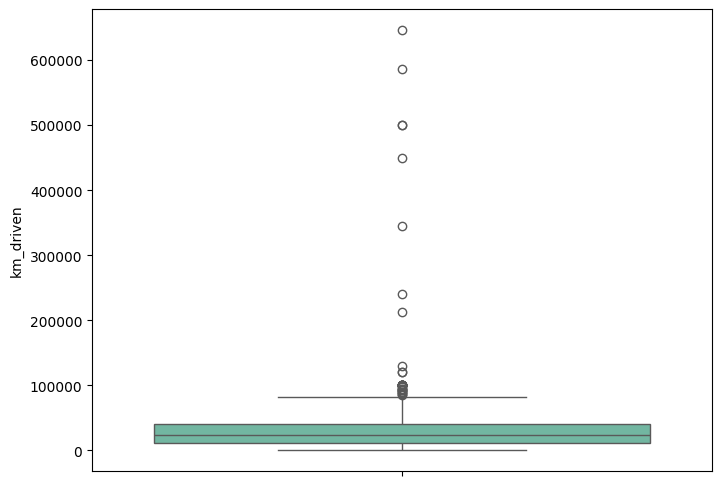

In [42]:
plt.figure(figsize = (8,6))
sns.boxplot(y = 'km_driven',data = df[df['owner']== '1st owner'],palette = 'Set2')
plt.show()

In [43]:
Q1 = df[df['owner']== '1st owner']['km_driven'].quantile(0.25)
Q3 = df[df['owner']== '1st owner']['km_driven'].quantile(0.75)


In [44]:
IQR = Q3 - Q1

In [45]:
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

In [46]:
first_owner_bikes_no_outliers = df[(df['owner']== '1st owner') & (df['km_driven'] >= Lower_bound) & (df['km_driven'] <= Upper_bound)]

In [47]:
print(f"{len('first_owner_bikes')}")

17


In [48]:
print(f"{len(first_owner_bikes_no_outliers)}")

889


In [49]:
print(f"{len(first_owner_bikes_no_outliers)}")

889


<ipython-input-50-96f262a15cdf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'km_driven',data = first_owner_bikes_no_outliers, palette = 'Set2')


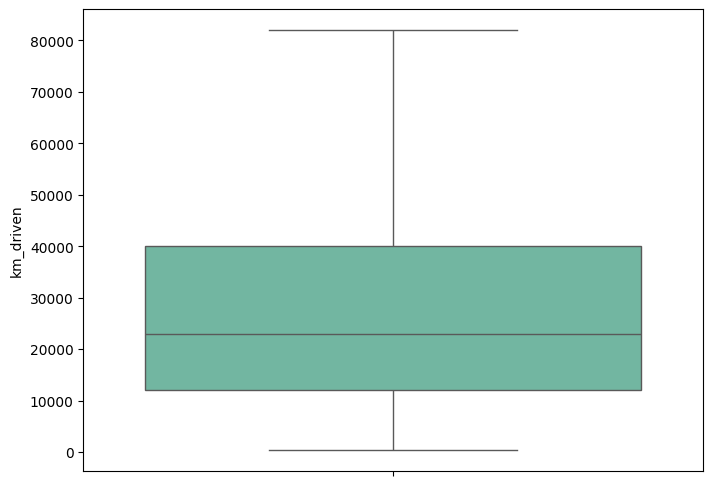

In [50]:
plt.figure(figsize = (8,6))
sns.boxplot(y = 'km_driven',data = first_owner_bikes_no_outliers, palette = 'Set2')
plt.show()

12) **perform bivariate analysis to visualise relationship between year and selling_price.**

In [51]:
df = pd.read_csv("/content/BIKE DETAILS.csv")

In [52]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


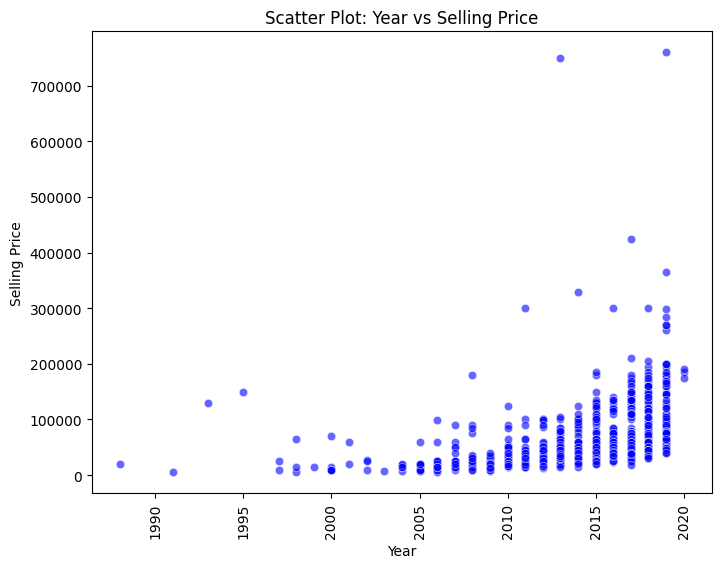

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='selling_price', data=df, color='blue', alpha=0.6)
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation = 90)
plt.show()


In [54]:
df = pd.read_csv("/content/BIKE DETAILS.csv")

13) **What is average depreciation in selling price based on the bike's age?**

<ipython-input-55-80016ea9f42d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = 'year',y = 'depreciation_percentage' ,data =avg_depreciation,palette = 'Set2')


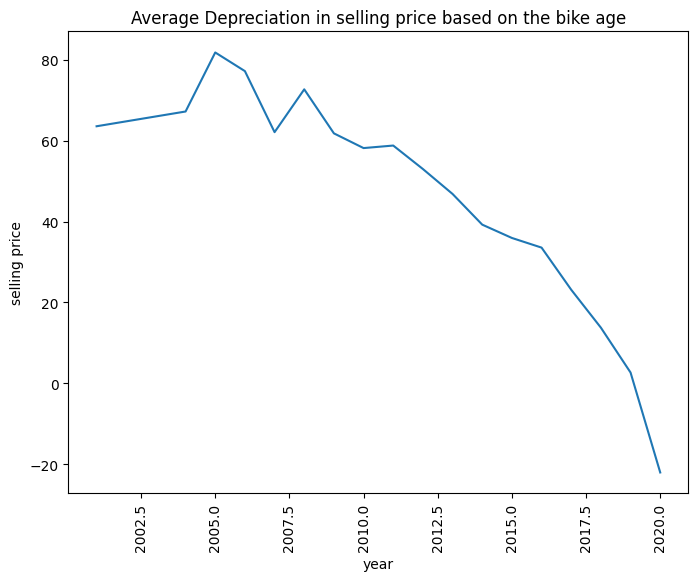

In [55]:
df['depreciation_percentage'] = (df['ex_showroom_price'] - df['selling_price'])/df['ex_showroom_price']*100
avg_depreciation = df.groupby('year')['depreciation_percentage'].mean().reset_index()
plt.figure(figsize = (8,6))
sns.lineplot(x = 'year',y = 'depreciation_percentage' ,data =avg_depreciation,palette = 'Set2')
plt.title('Average Depreciation in selling price based on the bike age')
plt.xlabel('year')
plt.ylabel('selling price')
plt.xticks(rotation = 90)
plt.show()

14) **Which bike names are priced significantly above the average price for their manufacturing year?**

In [57]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depreciation_percentage
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,-1.273344
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,27.490155
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,NaN
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,67.307692
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,68.627451
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,73.684211
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,79.310345


In [58]:
avg_price = df.groupby('year')['selling_price'].mean().reset_index()
avg_price.rename(columns = {'selling_price':'Average_price'},inplace = True)

In [59]:
df = pd.merge(df,avg_price,on = 'year',how = 'left')

In [62]:
threshold = 1.20
df['price_above_avg'] =df['selling_price'] > (df['Average_price'] * threshold)

In [65]:
df = pd.merge(df,avg_price,on = 'year',how = 'left')

MergeError: Passing 'suffixes' which cause duplicate columns {'Average_price_x'} is not allowed.

In [66]:
bikes_above_avg = df[df['price_above_avg']]


In [67]:
print(bikes_above_avg[['name', 'year', 'selling_price', 'Average_price']])

                                      name  year  selling_price  Average_price
0                Royal Enfield Classic 350  2019         175000  119689.511628
2      Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                           Yamaha YZF R3  2019         365000  119689.511628
17                        Yamaha YZF R15 S  2010          40000   31793.333333
...                                    ...   ...            ...            ...
984              Royal Enfield Classic 500  2014          95000   48668.131868
985              Royal Enfield Classic 500  2011          90000   35655.721311
1005                    TVS Apache RTR 160  2014          60000   48668.131868
1008                    Bajaj Pulsar 220 F  2012          52000   35748.400000
1023                Bajaj Avenger 220 dtsi  2012          45000   35748.400000

[233 rows x 4 columns]


In [68]:
print(f"Bikes priced above average for their year : \n{'bike_names_above_avg'}")

Bikes priced above average for their year : 
bike_names_above_avg


In [71]:
bike_names_above_avg = []
# Calculate average bike price for each year
Avg_bike_price = df.groupby('year')['selling_price'].mean().to_dict()  # Convert to dictionary for easier access

#Iterate through each year and average price
for year, avg_price in Avg_bike_price.items():
    above_avg_bikes = df[(df['year'] == year) & (df['selling_price'] > avg_price)]['name'].unique()
    bike_names_above_avg.extend(above_avg_bikes)
print(f"Bikes priced above average for their year:\n{bike_names_above_avg}")

Bikes priced above average for their year:
['Yamaha RXG', 'Yamaha RX135', 'Yamaha Rx', 'Royal Enfield Bullet 350 [2007-2011]', 'TVS Victor GLX', 'TVS Max DLX', 'TVS Victor', 'Hero Honda Splendor Plus', 'Bajaj Pulsar 150 [2001-2011]', 'TVS Victor GLX', 'Hero Honda Splendor Plus', 'Royal Enfield Thunderbird 350', 'Hero Honda CD Deluxe', 'Hero Honda Glamour', 'Hero Honda Passion Plus', 'Royal Enfield Thunderbird 350', 'Royal Enfield Electra 5 S', 'Hero Splendor Plus', 'Bajaj Pulsar 150', 'Royal Enfield Electra 5 S', 'Bajaj Pulsar 180', 'Honda CB Unicorn 150', 'Royal Enfield Bullet 350 [2007-2011]', 'Bajaj Xcd', 'Hero Honda Splendor Plus', 'Hero Honda Passion Plus', 'Honda Activa [2000-2015]', 'Hero Honda CBZ extreme', 'Royal Enfield Bullet 350 [2007-2011]', 'Royal Enfield Electra 4 S', 'Royal Enfield Machismo', 'Royal Enfield Electra 5 S', 'Bajaj Discover 135', 'Bajaj Pulsar 150 [2001-2011]', 'Yamaha FZ16', 'Hero Honda CD Deluxe', 'Hero Honda Hunk', 'Honda Activa [2000-2015]', 'Hero Honda

15) **Develop correlation matrix for numeric columns and visualise it using a heatmap.**

In [72]:
numric_cols = [col for col in df.columns if df[col].dtypes != 'object']

In [73]:
numric_cols

['selling_price',
 'year',
 'km_driven',
 'ex_showroom_price',
 'depreciation_percentage',
 'Average_price_x',
 'Average_price_y',
 'Average_price',
 'price_above_avg']

In [74]:
corration_matrix = df[numric_cols].corr()

<Axes: >

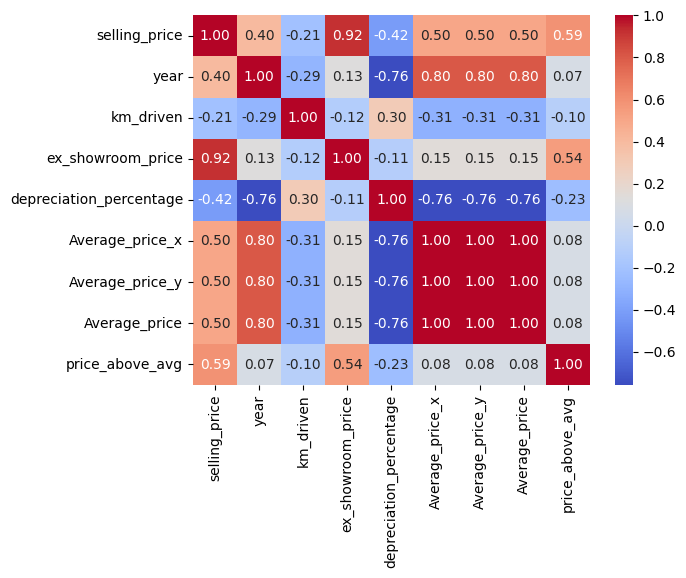

In [75]:
sns.heatmap(corration_matrix,annot = True,cmap = 'coolwarm',fmt = ".2f")

# **EDA - 2**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [79]:
df=pd.read_csv("Car Sale.csv")

In [80]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


1 ) **What is the average selling price of cars for each dealer , and how does it compare across different dealers?**

In [81]:
avg_price = df.groupby('Dealer_Name')['Price ($)'].mean()

<ipython-input-82-0be5a0f74798>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='Dealer_Name',y = 'Price ($)', data =avg_price, palette = 'viridis')


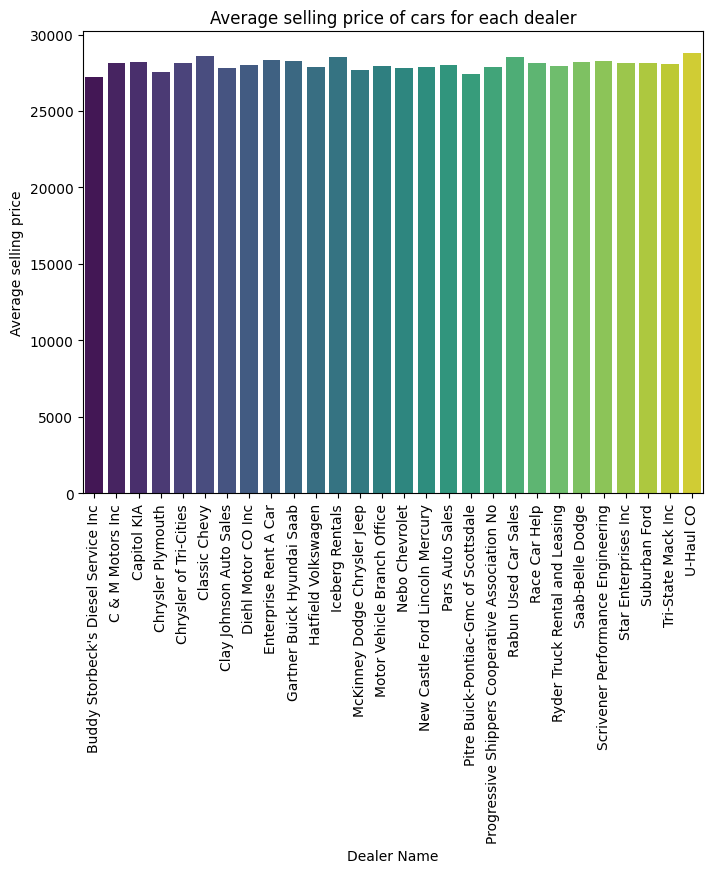

In [82]:
avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x ='Dealer_Name',y = 'Price ($)', data =avg_price, palette = 'viridis')
plt.title('Average selling price of cars for each dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average selling price')
plt.xticks(rotation = 90)
plt.show()

2) **Which car brand has highest variation in prices , and what does this tell us about the pricing trends?**

Lincoln company has highest variation in prices.

In [83]:
price_variation = df.groupby('Company')['Price ($)'].std().reset_index()
highest_variation = price_variation.sort_values(by = 'Price ($)',ascending = False)

In [84]:
price_variation = df.groupby('Company')['Price ($)'].std().reset_index()
highest_variation = price_variation.sort_values(by = 'Price ($)',ascending = False)

In [85]:
print(highest_variation)

       Company     Price ($)
15     Lincoln  19658.050211
24        Saab  19653.740089
4     Cadillac  19517.120220
21    Plymouth  19065.997338
14       Lexus  17852.923492
3        Buick  17142.232626
17     Mercury  16445.172195
19      Nissan  16214.264017
25      Saturn  15990.223671
8         Ford  15849.090227
16  Mercedes-B  15722.807459
20  Oldsmobile  15711.345857
27      Toyota  15367.131714
2          BMW  15065.578723
22     Pontiac  14348.963592
11    Infiniti  13696.332844
5    Chevrolet  13311.063223
29       Volvo  12933.790185
26      Subaru  12920.771620
1         Audi  12904.243867
28  Volkswagen  12527.124011
18  Mitsubishi  11671.343035
6     Chrysler  11583.286811
7        Dodge  11187.592085
9        Honda  11148.629062
12      Jaguar  10222.531533
13        Jeep   9459.834418
0        Acura   8183.046414
23     Porsche   5261.839206
10     Hyundai   3485.982649


3) **What is distribution of car prices for each transmission type,and how do the interquartile ranges compare?**

Manual transmission has a hight IQR

In [86]:
IQR= df.groupby('Transmission')['Price ($)'].quantile(0.75)-df.groupby('Transmission')['Price ($)'].quantile(0.25)

In [87]:
IQR

,Price ($)
Transmission,
Auto,16500.0
Manual,17000.0


<ipython-input-88-22c1af2b63ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')


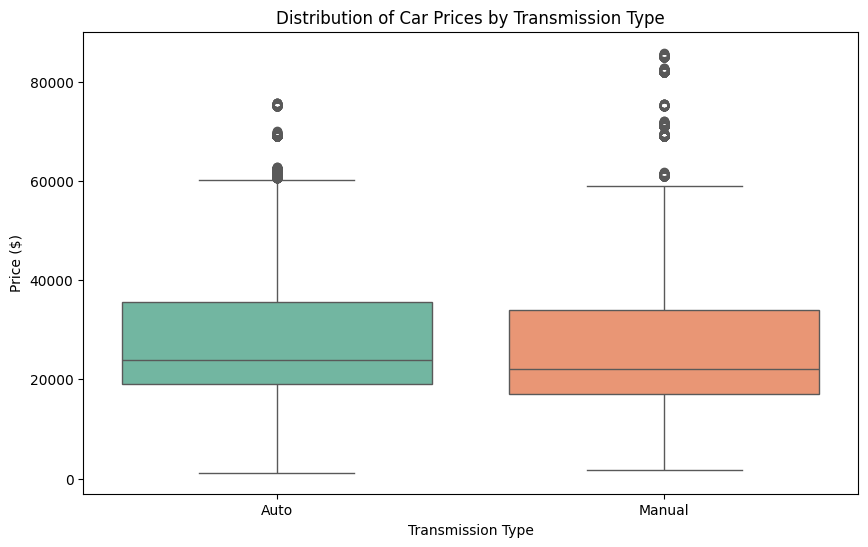

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()


4) **What is the distribution of car prices across diffrent region?**

In [89]:
distribution_car = df.groupby('Dealer_Region')['Price ($)'].value_counts()

In [90]:
distribution_car

Dealer_Region  Price ($)
Aurora         22000        155
               19000        127
               21000        122
               26000         96
               18000         81
                           ... 
Scottsdale     71210          1
               71580          1
               71990          1
               82500          1
               82750          1
Name: count, Length: 2447, dtype: int64

<ipython-input-91-5d29a55d968d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='Dealer_Region',y = 'Price ($)',data = df,palette='viridis' )


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

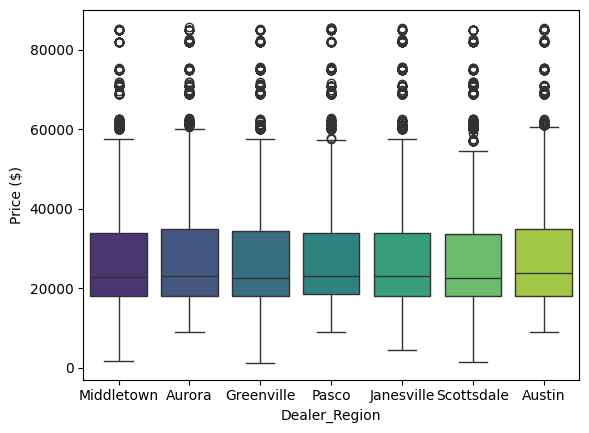

In [91]:
sns.boxplot(x ='Dealer_Region',y = 'Price ($)',data = df,palette='viridis' )

5) **What is distribution of cars based on body styles?**

<ipython-input-92-3baa966dcf49>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Body Style',data = df, palette = 'viridis')


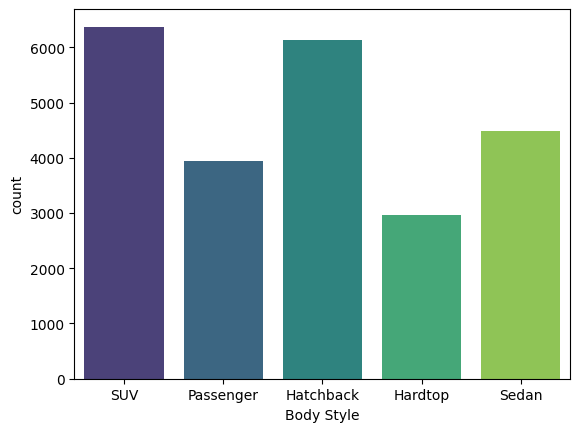

In [92]:
sns.countplot(x = 'Body Style',data = df, palette = 'viridis')
plt.show()

In [93]:
df['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


6) **How does average selling price of cars vary by customer gender and annual income?**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


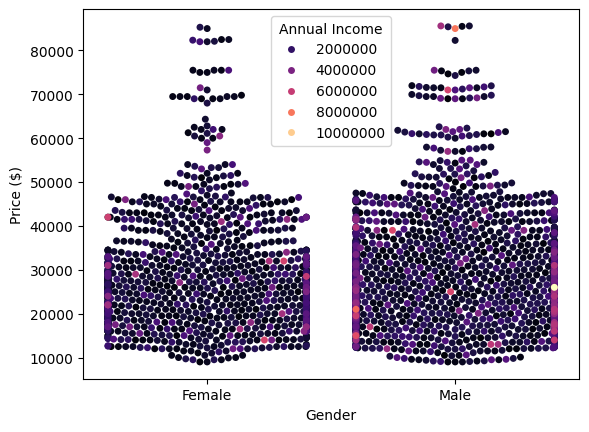

In [94]:
avg_price = df.groupby(['Gender','Annual Income'])['Price ($)'].mean().reset_index()
sns.swarmplot(x = 'Gender' , y = 'Price ($)',hue = 'Annual Income',data = avg_price ,palette = 'magma' )
plt.show()

7) **what is distribution of car prices by region , and how does the number of cars sold vary by region?**

<ipython-input-95-81ca2c71991e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Dealer_Region',y = 'Price ($)',data = df, palette='pastel' )


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

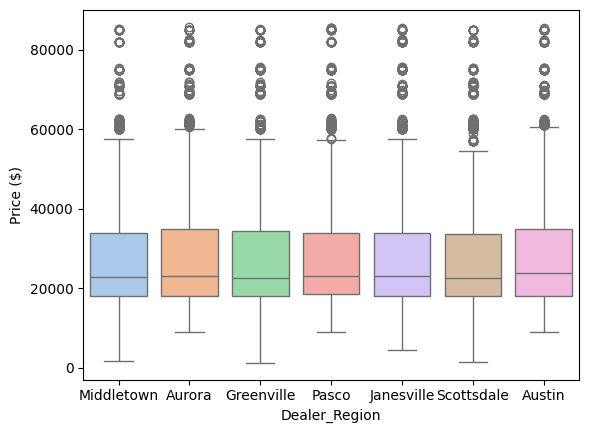

In [95]:
sns.boxplot(x = 'Dealer_Region',y = 'Price ($)',data = df, palette='pastel' )

<ipython-input-96-505fe5187b71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dealer_Region', y='counts', data = car_sale_by_region, palette='viridis')


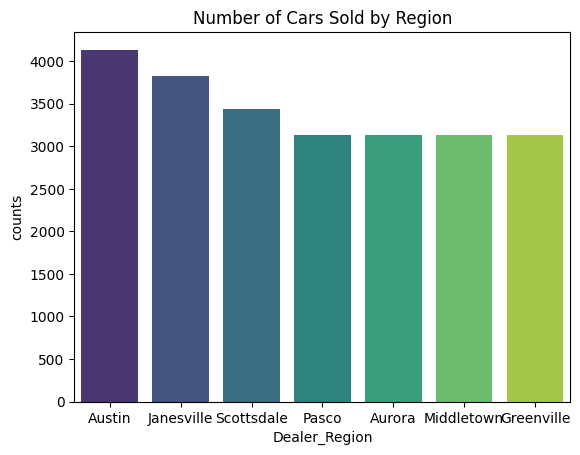

In [96]:
car_sale_by_region = df['Dealer_Region'].value_counts()
car_sale_by_region = car_sale_by_region.rename_axis('Dealer_Region').reset_index(name='counts')
car_sale_by_region.columns = ['Dealer_Region','counts']
sns.barplot(x='Dealer_Region', y='counts', data = car_sale_by_region, palette='viridis')
plt.title('Number of Cars Sold by Region')
plt.show()

In [ ]:
car_sale_by_region = car_sale_by_region.rename_axis('Dealer_Region').reset_index(name='counts')

In [100]:
car_sale_by_region

,Dealer_Region,counts
0,Austin,4135
1,Janesville,3821
2,Scottsdale,3433
3,Pasco,3131
4,Aurora,3130
5,Middletown,3128
6,Greenville,3128


8) **How does the average car price differ between cars with different engine size?**

In [101]:
age_car_price = df.groupby(['Engine','Body Style'])['Price ($)'].mean()

In [102]:
age_car_price

Engine                     Body Style
DoubleÂ Overhead Camshaft  Hardtop       31520.188210
                           Hatchback     25910.544824
                           Passenger     28915.835149
                           SUV           27501.404407
                           Sedan         29955.294344
Overhead Camshaft          Hardtop       27016.943698
                           Hatchback     28702.550562
                           Passenger     28969.521039
                           SUV           26079.019161
                           Sedan         29664.271572
Name: Price ($), dtype: float64

<Axes: xlabel='Body Style', ylabel='Price ($)'>

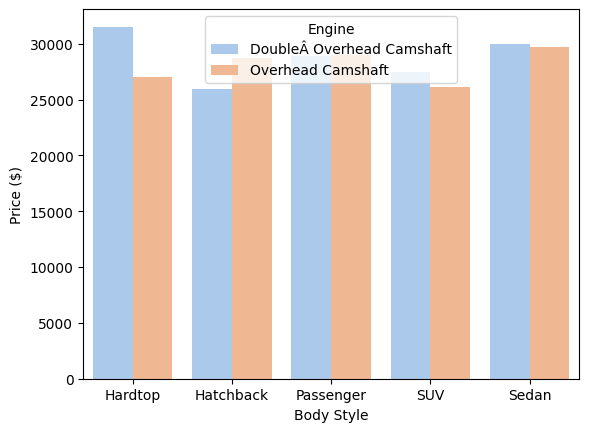

In [103]:
age_car_price = df.groupby(['Engine','Body Style'])['Price ($)'].mean().reset_index()
sns.barplot(x ='Body Style', y ='Price ($)',hue ='Engine',  data = age_car_price,palette = 'pastel' )

9) **How do car prices vary based on the customer's annual income bracket?**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv("/content/Car Sale.csv")

<ipython-input-107-771c86e0f6c0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual Income', y='Price ($)', data=avg_price_by_income, palette='viridis')


<Axes: xlabel='Annual Income', ylabel='Price ($)'>

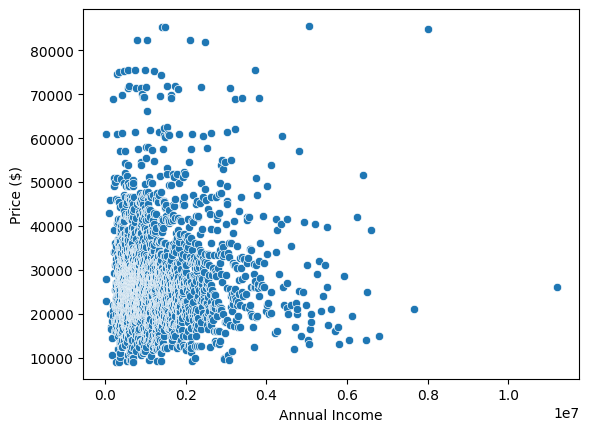

In [107]:

avg_price_by_income = df.groupby('Annual Income')['Price ($)'].mean().reset_index()
sns.scatterplot(x='Annual Income', y='Price ($)', data=avg_price_by_income, palette='viridis')

In [108]:
df['Annual Income'].value_counts()

,count
Annual Income,
13500,5273
1100000,162
600000,160
800000,151
1300000,148
...,...
2145000,1
3171000,1
1134000,1


In [109]:
min_income = df['Annual Income'].min()
max_income = df['Annual Income'].max()

print(f"Range of Annual Income: {min_income} to {max_income}")

Range of Annual Income: 10080 to 11200000


**10)** **What are top 5 models with the highest number of sales,and how does their price distribution look?**

In [110]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [111]:
models = df.groupby('Price ($)')['Model'].value_counts().reset_index()

In [112]:
models

,Price ($),Model,count
0,1200,Taurus,1
1,1450,S-Class,1
2,1700,Town car,1
3,2200,CL500,1
4,4200,Explorer,1
...,...,...,...
3460,85500,Eldorado,1
3461,85600,Eldorado,1
3462,85600,RAV4,1
3463,85601,Eldorado,1


<ipython-input-113-7d3ee28d7837>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price ($)'],kde = True)


<Axes: xlabel='Price ($)', ylabel='Density'>

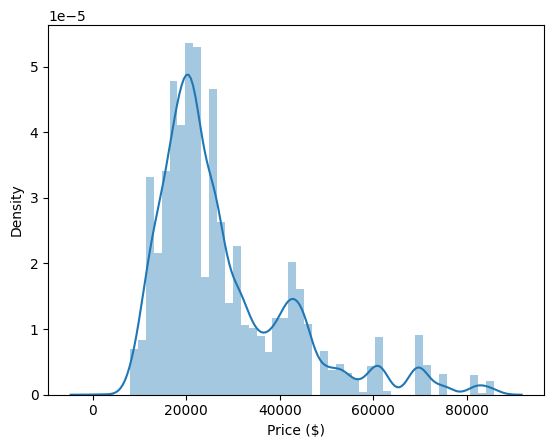

In [113]:
sns.distplot(df['Price ($)'],kde = True)

In [114]:
models.columns = ['Price ($)', 'Model','Count']


In [115]:
top_5_models = models.sort_values(by='Price ($)', ascending=False).head(5)


In [116]:
top_5_models

,Price ($),Model,Count
3464,85800,Eldorado,1
3463,85601,Eldorado,1
3462,85600,RAV4,1
3461,85600,Eldorado,1
3460,85500,Eldorado,1


<Axes: xlabel='Price ($)', ylabel='count'>

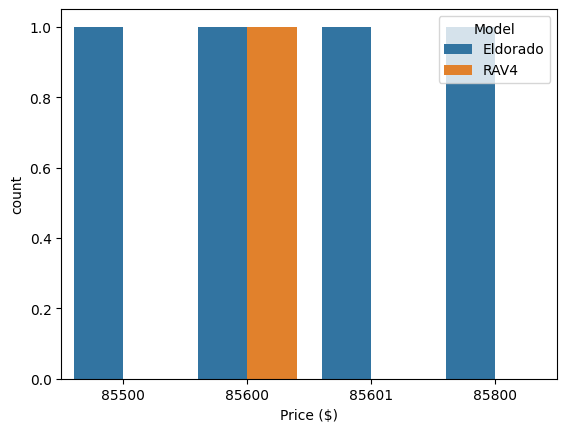

In [117]:
#sns.boxplot(x='Model', y='Price ($)', data=top_5_models, palette='Set2')
sns.countplot( x='Price ($)',hue='Model', data=top_5_models)

11) **How does car price vary with engine size across different car colors, and which colors have highest price variation?**

In [118]:
grouped = df.groupby(['Engine','Color'])['Price ($)'].agg(['mean','std']).reset_index()


In [119]:
color_variation = grouped[['Color','std']].groupby('Color').mean().reset_index()


In [120]:
color_variation

,Color,std
0,Black,14938.039736
1,Pale White,13701.258231
2,Red,15422.998401


In [121]:
color_sorted = color_variation.sort_values(by = 'std',ascending = False)

<ipython-input-122-dc631a8b5e3b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Color',y = 'std',data = color_sorted,palette = 'viridis')


<Axes: xlabel='Color', ylabel='std'>

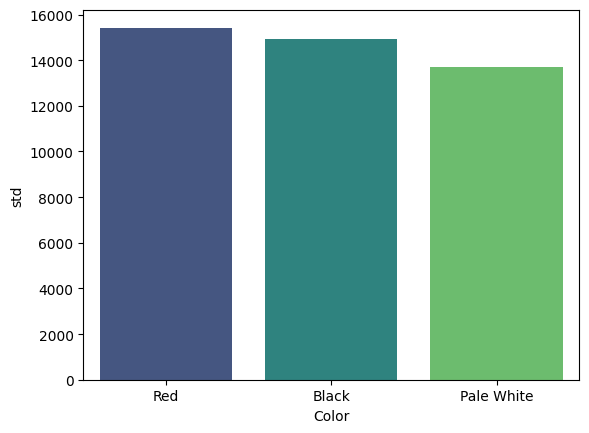

In [122]:
sns.barplot(x = 'Color',y = 'std',data = color_sorted,palette = 'viridis')

12) **Is there any seasonal trend in car sales based on the date of sale?**

car sold high based on month of 12 so is there any trend in month of 12


In [123]:
df['Date'] = pd.to_datetime(df["Date"])

In [124]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

In [126]:
trend = df.groupby('month')['Price ($)'].value_counts().reset_index()

In [127]:
trend

,month,Price ($),count
0,1,22000,41
1,1,19000,36
2,1,21000,31
3,1,14000,26
4,1,17000,25
...,...,...,...
3200,12,82450,1
3201,12,82500,1
3202,12,82750,1
3203,12,85200,1


In [128]:
car_sale = trend[['month','count']].groupby('month').mean().reset_index()

In [129]:
car_sale

,month,count
0,1,4.488636
1,2,4.481707
2,3,6.239837
3,4,6.953782
4,5,6.719858
5,6,6.915323
6,7,7.012195
7,8,6.409774
8,9,9.954819
9,10,6.512456


In [130]:
car_sold = car_sale.sort_values(by = 'count',ascending = False)

In [131]:
car_sold

,month,count
8,9,9.954819
11,12,9.795580
10,11,9.532967
6,7,7.012195
3,4,6.953782
5,6,6.915323
4,5,6.719858
9,10,6.512456
7,8,6.409774
2,3,6.239837


<ipython-input-132-5da02fe3b2c1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'month',data = df, palette = 'pastel' )


<Axes: xlabel='month', ylabel='count'>

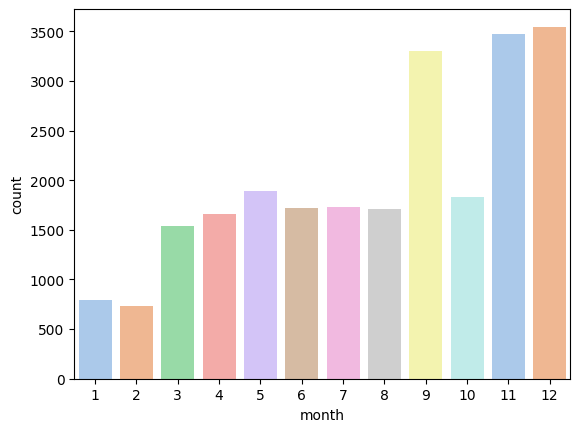

In [132]:
sns.countplot(x = 'month',data = df, palette = 'pastel' )

13) **How does the car price distribution change the when considering different combinations of body style and transmission type?**

In [133]:
car_price_distribution = df.groupby(['Body Style','Transmission'])['Price ($)'].mean().reset_index()

In [134]:
car_price_distribution

,Body Style,Transmission,Price ($)
0,Hardtop,Auto,31520.188210
1,Hardtop,Manual,27016.943698
2,Hatchback,Auto,25910.544824
3,Hatchback,Manual,28702.550562
4,Passenger,Auto,28915.835149
5,Passenger,Manual,28969.521039
6,SUV,Auto,27501.404407
7,SUV,Manual,26079.019161
8,Sedan,Auto,29955.294344
9,Sedan,Manual,29664.271572


<Axes: xlabel='Body Style', ylabel='Price ($)'>

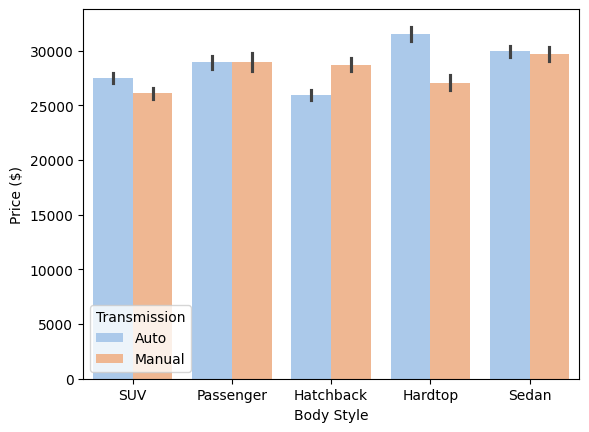

In [135]:
sns.barplot(x = 'Body Style',y = 'Price ($)',hue = 'Transmission',data = df,palette = 'pastel')

14) **what is the corration between car price , engine size , and annual income of customers, and how do these features interect?**

In [136]:
df['Price ($)'] = pd.to_numeric(df['Price ($)'],errors = 'coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'],errors = 'coerce')
engine_mapping = {engine : i for i ,engine in enumerate(df['Engine'].unique())}
df['Engine_numeric'] = df['Engine'].map(engine_mapping)
corration_between_features = df[['Price ($)','Engine_numeric','Annual Income']].corr()
print(corration_between_features)

                Price ($)  Engine_numeric  Annual Income
Price ($)        1.000000       -0.011271       0.012065
Engine_numeric  -0.011271        1.000000      -0.006598
Annual Income    0.012065       -0.006598       1.000000


<Axes: >

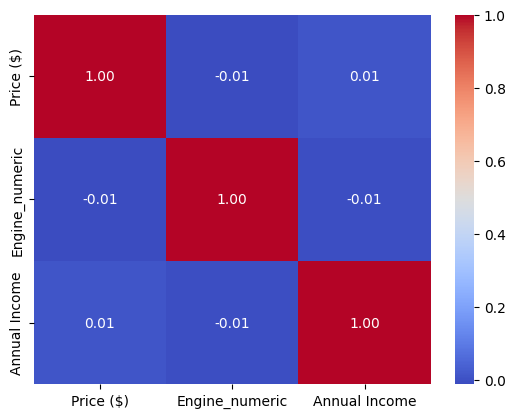

In [137]:
sns.heatmap(corration_between_features,annot = True,cmap = 'coolwarm',fmt = '.2f')

In [138]:
engine_mapping = {engine : i for i ,engine in enumerate(df['Engine'].unique())}
df['Engine_numeric'] = df['Engine'].map(engine_mapping)

In [139]:
engine_mapping

{'DoubleÂ\xa0Overhead Camshaft': 0, 'Overhead Camshaft': 1}

15) **How does the average car price vary across different car models and engine types?**

In [140]:
price_vary_between = df.groupby(['Model','Engine'])['Price ($)'].mean().reset_index()

In [141]:
price_vary_between

,Model,Engine,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


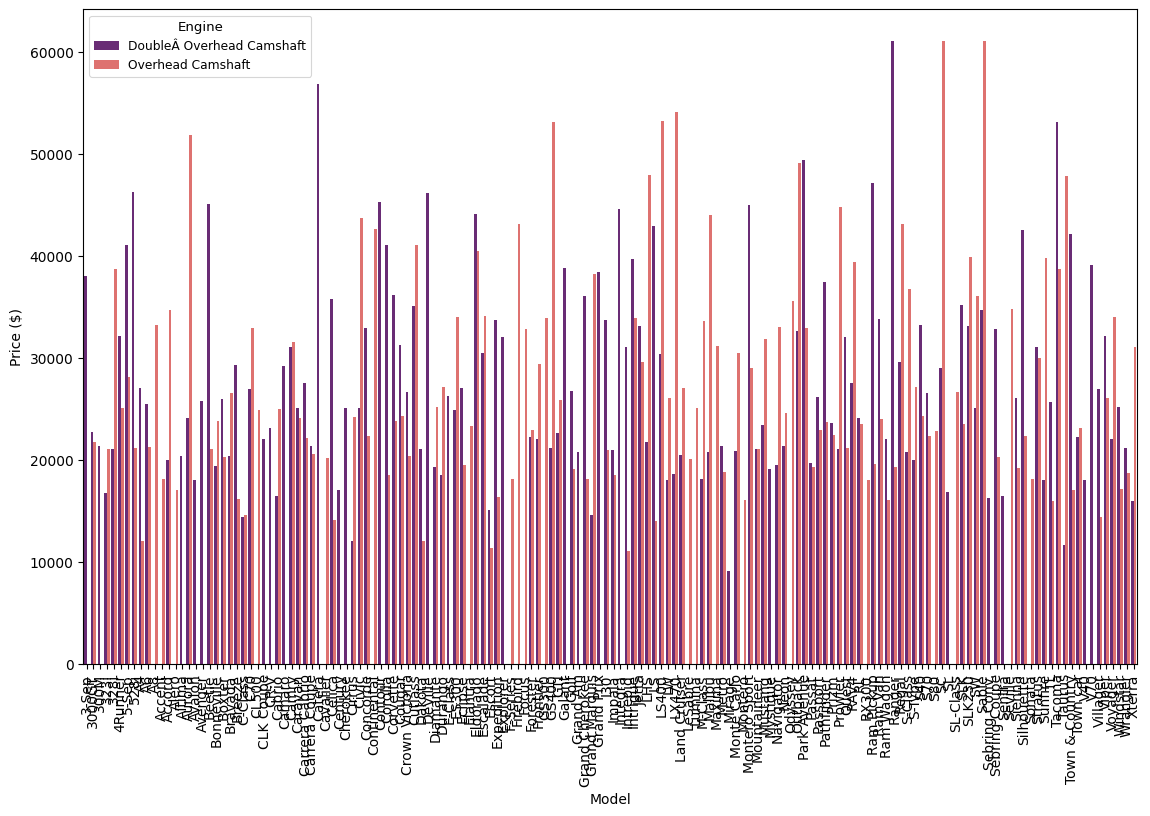

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(13.6, 8.5)
sns.set_context("paper",  rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})

sns.barplot(x='Model', y='Price ($)', hue='Engine', data=price_vary_between, palette='magma')
plt.xticks(rotation = 90)
plt.show()

# **EDA 3**  

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [145]:
df=pd.read_csv('amazon.csv')

In [146]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

1) **What is the average rating for each product category?**

In [147]:
df['rating'] = pd.to_numeric(df['rating'],errors = 'coerce')
average_rating = df.groupby('category')['rating'].mean().reset_index()

In [148]:
average_rating

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


2) **What are the top rating count products by category?**

In [149]:
df['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, nan, 2. , 2.6, 2.9])

In [150]:
df['rating'] =df['rating'].fillna(0)
df['rating']  = pd.to_numeric(df['rating'],errors = 'coerce')


In [151]:
df['rating']

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [152]:
max_rate_row = df.loc[df['rating'].idxmax()]
max_rate = max_rate_row['rating']
max_rate_product = max_rate_row['product_name']
max_rate_category = max_rate_row['category']

print(f"Product : {max_rate_product}, Category: {max_rate_category}, Rating: {max_rate}")


Product : Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White), Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Rating: 5.0


3) **What is the distribution of discounted prices vs.actual prices?**

In [153]:
df = pd.read_csv("/content/amazon.csv")

In [154]:
df_copy = df.copy()

In [155]:
df['discounted_price'].unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [156]:
df['actual_price'].fillna(0)

,actual_price
0,"₹1,099"
1,₹349
2,"₹1,899"
3,₹699
4,₹399
...,...
1460,₹919
1461,"₹3,045"
1462,"₹3,080"
1463,"₹1,890"


In [157]:
df['discounted_price'].fillna(0)

,discounted_price
0,₹399
1,₹199
2,₹199
3,₹329
4,₹154
...,...
1460,₹379
1461,"₹2,280"
1462,"₹2,219"
1463,"₹1,399"


In [158]:
char_to_remove = ["₹",","]
for char in char_to_remove:
  df["discounted_price"]=df["discounted_price"].str.replace(char,"")
  df["actual_price"]=df["actual_price"].str.replace(char,"")

In [159]:
df["actual_price"].astype(float)

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


In [160]:
df["discounted_price"].astype(float)

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0
...,...
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0


In [161]:
df.dropna(axis = 0 ,inplace = True)

In [162]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Create subplots with two columns
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Distribution of Discounted Prices', 'Distribution of Actual Prices'),
                    shared_yaxes=True)

# Plotting the distribution of Discounted Price
fig.add_trace(
    go.Histogram(x=df['discounted_price'],
                 name='Discounted Price',
                 marker_color='blue',
                 opacity=0.7,
                 nbinsx=20),
    row=1, col=1
)

# Plotting the distribution of Actual Price
fig.add_trace(
    go.Histogram(x=df['actual_price'],
                 name='Actual Price',
                 marker_color='red',
                 opacity=0.7,
                 nbinsx=20),
    row=1, col=2
)

# Update the layout to add titles and labels
fig.update_layout(
    title_text="Price Distribution",
    barmode='overlay',  # Overlays histograms
    xaxis_title="Discounted Price",
    xaxis2_title="Actual Price",
    yaxis_title="Frequency",
    showlegend=True,
    height=600,  # Adjust the height
)

# Show the plot
fig.show()


4) **How does the average discount percentage vary across categories?**

In [163]:
df['discount_percentage'].unique()

array(['64%', '43%', '90%', '53%', '61%', '85%', '65%', '23%', '50%',
       '33%', '55%', '63%', '69%', '60%', '13%', '44%', '38%', '39%',
       '46%', '41%', '70%', '42%', '72%', '25%', '51%', '73%', '0%',
       '80%', '28%', '67%', '58%', '35%', '45%', '62%', '54%', '27%',
       '77%', '56%', '78%', '31%', '86%', '47%', '37%', '75%', '32%',
       '68%', '66%', '22%', '57%', '17%', '52%', '88%', '20%', '59%',
       '40%', '26%', '29%', '83%', '71%', '15%', '76%', '48%', '82%',
       '36%', '89%', '87%', '24%', '34%', '11%', '91%', '7%', '19%',
       '79%', '21%', '81%', '18%', '49%', '30%', '84%', '10%', '6%',
       '14%', '74%', '4%', '5%', '16%', '8%', '2%', '94%', '12%', '3%',
       '9%'], dtype=object)

In [164]:
char_to_remove = ["%" , ""]
for char in char_to_remove:
  df['discount_percentage']= df['discount_percentage'].str.replace(char,"")

In [165]:
 df['discount_percentage'].astype(int)

,discount_percentage
0,64
1,43
2,90
3,53
4,61
...,...
1460,59
1461,25
1462,28
1463,26


In [166]:
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'],errors = 'coerce')

In [167]:
discount_vary_across_category = df.groupby('category')['discount_percentage'].mean().reset_index()

In [168]:
import plotly.express as px
fig = px.scatter(discount_vary_across_category, x='category', y='discount_percentage', title='Discount Percentage by Category')
fig.update_layout(
    xaxis_tickmode='array',  # Use custom tick positions
    #xaxis_tickvals=discount_vary_across_category['category'][::5],  # Show every 5th category label
)

# Show the plot
fig.show()

5) **What are the most popular product name?**

In [169]:
by_popular_rating_count=df.groupby('product_name').agg(total_ratings=('rating','sum'),total_ratings_count=('rating_count','sum')).reset_index()
most_popular_byrating = by_popular_rating_count.sort_values(by ='total_ratings',ascending=False).head(10)
most_popular_byrating_count = by_popular_rating_count.sort_values(by = 'total_ratings_count',ascending = False).head(10)

In [170]:
most_popular_byrating_count

,product_name,total_ratings,total_ratings_count
362,Eureka Forbes car Vac 100 Watts Powerful Sucti...,|,992
364,Eveready Red 1012 AAA Batteries - Pack of 10,4.3,989
1005,Sennheiser CX 80S in-Ear Wired Headphones with...,4.1,"98,250"
806,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,3.7,976
1235,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,4.34.3,974974
1237,Zoul USB Type C Fast Charging 3A Nylon Braided...,4.3,974
1275,boAt Rockerz 400 Bluetooth On Ear Headphones W...,4.14.1,"97,17597,174"
622,Livpure Glo Star RO+UV+UF+Mineraliser - 7 L St...,4.3,97
72,Amazon Basics 300 W Hand Blender with Stainles...,4,97
552,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,4,97


6) **What are the most popular product keywords?**

In [171]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import nltk

# Download the punkt_tab resource if it's not already present
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Download stopwords if not already present
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')


# Assuming you have the dataset loaded
# df = pd.read_csv('your_amazon_data.csv')

# Example dataset
# df = pd.DataFrame({
#     'product_name': ['Wireless Bluetooth Speaker', 'Bluetooth Headphones', 'Smartphone Case', 'Laptop Sleeve', 'Wireless Charger']
# })

# 1. Preprocess the data: Clean the product names
# Convert text to lowercase and remove punctuation
df['cleaned_product_name'] = df['product_name'].apply(lambda x: x.lower())
df['cleaned_product_name'] = df['cleaned_product_name'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# 2. Tokenization: Split the product names into words
df['tokens'] = df['cleaned_product_name'].apply(word_tokenize)

# 3. Remove stopwords
stop_words = set(stopwords.words('english'))

df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# 4. Flatten the list of all tokens into a single list
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# 5. Count word frequencies
word_counts = Counter(all_tokens)

# 6. Display the most common keywords
most_common_keywords = word_counts.most_common(10)  # Change the number to get more or fewer

print("Most popular product keywords:")
for word, count in most_common_keywords:
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most popular product keywords:
black: 467
cable: 399
usb: 390
charging: 244
fast: 209
c: 185
smart: 172
white: 154
type: 147
tv: 147


7) **What are the most popular product reviews?**

In [172]:
review_counts = df['review_title'].value_counts().reset_index()
review_counts.columns = ['review_title', 'frequency']
top_frequent_reviews = review_counts.head(5)


In [173]:
top_frequent_reviews

,review_title,frequency
0,"Worked on iPhone 7 and didn’t work on XR,Good ...",10
1,"Satisfied,Charging is really fast,Value for mo...",8
2,"Phone, camera, heating - works for me, may not...",8
3,"Good product,Good one,Nice,Really nice product...",7
4,"A Good Braided Cable for Your Type C Device,Go...",7


8) **What is corration between discounted_price and rating?**

In [174]:
df['discounted_price'].unique()

array(['399', '199', '329', '154', '149', '176.63', '229', '499', '299',
       '219', '350', '159', '349', '13999', '249', '13490', '970', '279',
       '59', '11499', '14999', '179', '389', '599', '99', '899', '32999',
       '209', '19999', '999', '333', '507', '309', '1199', '799', '6999',
       '230', '649', '15999', '348', '32990', '139', '263', '7999',
       '1599', '26999', '115', '10901', '1434', '7299', '325', '29999',
       '27999', '30990', '269', '24999', '18990', '290', '345', '1099',
       '719', '849', '21999', '449', '37999', '7390', '273.10', '15990',
       '210', '1299', '347', '228', '1499', '8499', '20990', '9999',
       '489', '23999', '689', '1699', '655', '749', '195', '416', '368',
       '29990', '339', '15490', '9490', '637', '1089', '12499', '1399',
       '88', '57.89', '205', '949', '379', '8990', '486', '5699', '709',
       '47990', '320', '129', '225', '547', '259', '239', '467', '11990',
       '252', '204', '6490', '235', '42999', '173', '848.99

In [175]:
char_to_remove = [",","₹",""]
for char in char_to_remove:
  df['discounted_price'] = df['discounted_price'].str.replace(char,"")

In [176]:
df['discounted_price'].astype(float)

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0
...,...
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0


In [177]:
df['discounted_price'] = pd.to_numeric(df['discounted_price'],errors = 'coerce')
df['rating'] = pd.to_numeric(df['rating'],errors = 'coerce')

In [178]:
corration = df['discounted_price'].corr(df['rating'])

In [179]:
corration

0.12113187526066266

9) **What are the top 5 categories based on the hightest ratings?**

In [180]:
high_rate = df.groupby('category')['rating'].mean().reset_index()
top_5_categories = high_rate.sort_values(by = 'rating',ascending=False)

In [181]:
top_5_categories.head(5)

,category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
196,OfficeProducts|OfficeElectronics|Calculators|B...,4.5


10) **Identify any potiential areas for improvement or optimization based on data analysis.**

based on lower rating on 5 categories need to improvement after analysis.

In [182]:
df['rating'].str.replace("|","0")

AttributeError: Can only use .str accessor with string values!

In [ ]:
char_to_remove = ["|" , ""]
for char in char_to_remove:
  df["rating"] = df['rating'].str.replace(char,"")


In [183]:
 df["rating"].astype(float)

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [184]:
df["rating"] = pd.to_numeric(df["rating"],errors = 'coerce')

In [185]:
data_analysis = df.groupby('category')['rating'].mean().reset_index()

In [186]:
improve_data_analysis = data_analysis.sort_values(by = 'rating',ascending = True)

In [187]:
improve_data_analysis.head(5)

,category,rating
146,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",3.3
14,Computers&Accessories|Accessories&Peripherals|...,3.4
2,Computers&Accessories|Accessories&Peripherals|...,3.5
88,"Electronics|HomeTheater,TV&Video|Accessories|3...",3.5
56,"Computers&Accessories|Printers,Inks&Accessorie...",3.6


# **EDA 4**

In [190]:
df=pd.read_csv('spotify.csv')

In [191]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


1 ) **Read the DataFrame ,check null value if present then do the needful , check duplicate row ,if present then do the needful**

In [192]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [193]:
df.duplicated().sum()

27

In [194]:
df.drop_duplicates(inplace = True)

In [195]:
df.duplicated().sum()

0

**2 ) What is the distribution of popularity among the tracks in the dataset ? visualise it using a histogram.**

In [196]:
popularity_list = df.groupby("Track Name")['Popularity'].mean().reset_index()

In [197]:
popularity_list

,Track Name,Popularity
0,20 Min,84.0
1,3 Headed Goat (feat. Lil Baby & Polo G),75.0
2,3D (feat. Jack Harlow),84.0
3,4:44,74.0
4,6 Foot 7 Foot,74.0
...,...,...
407,pop ur shit,79.0
408,prove it,82.0
409,pushin P (feat. Young Thug),75.0
410,redrum,96.0


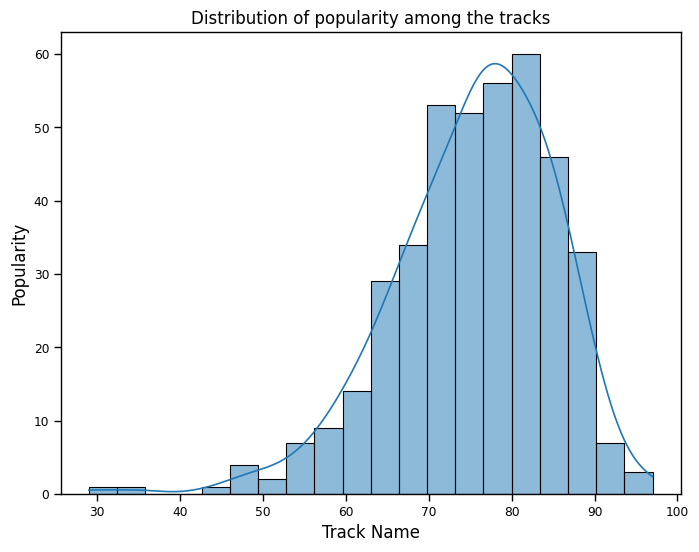

In [198]:
plt.figure(figsize = (8,6))
sns.histplot(popularity_list['Popularity'],bins =20, palette = 'pastel',kde = True)
plt.xlabel("Track Name")
plt.ylabel("Popularity")
plt.title("Distribution of popularity among the tracks")
plt.show()

3) **Is there any relationship between the popularity and duration of tracks?Explore this using scatter plot.**

In [199]:
df['Duration (ms)'].unique()

array([319191, 173986, 260111, 247444, 218364, 198973, 298940, 246133,
       291175, 239359, 157560, 215280, 213817, 184013, 218146, 220293,
       192840, 149546, 231266, 172137, 226613, 180869, 210626, 109750,
       200013, 199386, 170977, 201920, 166299, 191700, 211582, 251249,
       243836, 220584, 194786, 239613, 312820, 353754, 138411, 201812,
       212352, 173947, 156578, 139741, 227478, 242453, 113292, 125302,
       199920, 182666, 265996, 189893, 313546, 204600, 238253, 172933,
       237918, 255053, 231746, 357706, 299333, 243490, 221813, 228093,
       286906, 236883, 248586, 270697, 221520, 143718, 193591, 198292,
       195046, 207585, 290320, 250760, 284200, 326466, 210800, 263373,
       297786, 350320, 404106, 250188, 232186, 386906, 177000, 213400,
       275253, 252262, 247800, 211420, 219333, 185946, 276920, 205733,
       267520, 201453, 272506, 178213, 140746, 284493, 283066, 187541,
       253390, 175099, 200889, 217288, 204466, 156944, 136400, 223712,
      

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

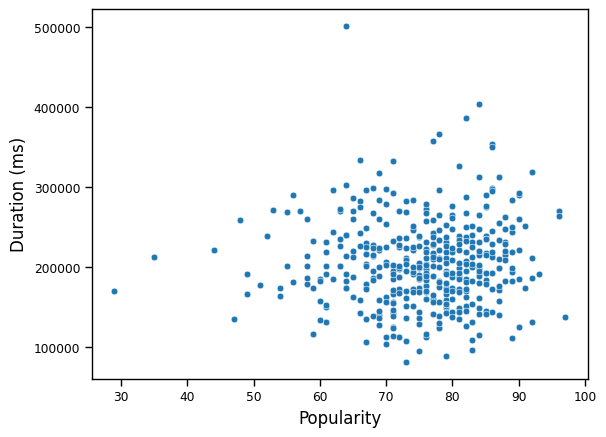

In [200]:
sns.scatterplot(x = 'Popularity',y = 'Duration (ms)', data = df,palette = 'pastel')

4)**Which artist has highest number of tracks in the dataset?Display count of track for each artist using countplot.**

In [201]:
highest_track_artist = df['Artist'].value_counts().idxmax()

In [202]:
highest_track_artist

'Drake'

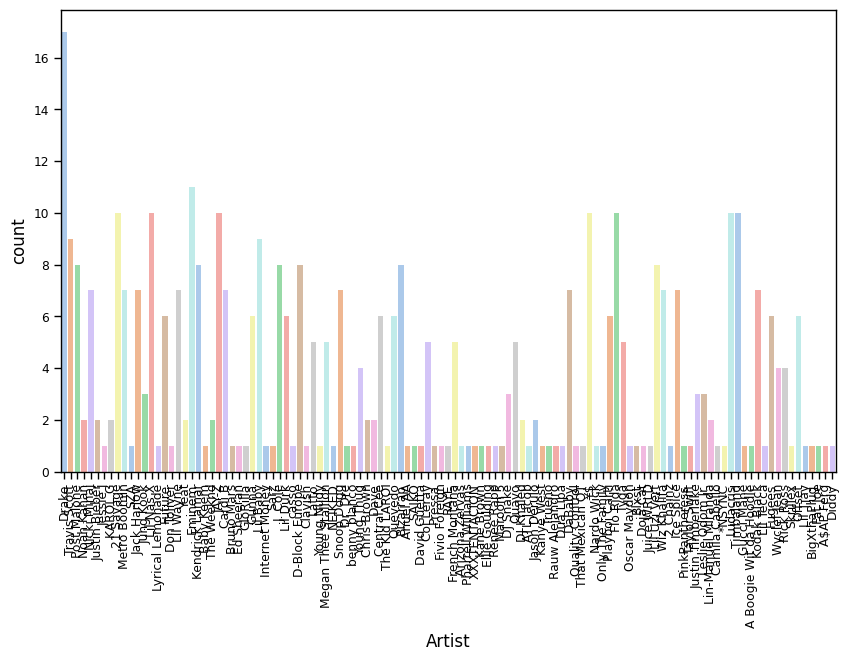

In [203]:
plt.figure(figsize = (10,6))
sns.countplot(x ='Artist',data = df,palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()

5) **What are the top 5 least popular tracks in the dataset?Provide the artist name and track name for each.**

In [204]:
popular_track = df.groupby(['Track Name','Artist'])['Popularity'].value_counts().reset_index()

In [205]:
popular_track_by_name = popular_track.sort_values(by = 'Popularity',ascending = False)

In [206]:
popular_track_by_name.head(5)

,Track Name,Artist,Popularity,count
182,Lovin On Me,Jack Harlow,97,1
411,redrum,21 Savage,96,1
57,CARNIVAL,¥$,96,1
88,FE!N (feat. Playboi Carti),Travis Scott,93,1
260,Prada,cassö,92,1


6) **Among the top 5 most popular artists, which artist has highest popularity on average ? calculate and display the average popularity for each artist.**

Jack Harlow has the highest popularity on average.

In [207]:
popular_track = df.groupby(['Track Name','Artist'])['Popularity'].mean().reset_index()

In [208]:
popular_track_by_name = popular_track.sort_values(by = 'Popularity',ascending = False)


In [209]:
popular_track_by_name.head(5)

,Track Name,Artist,Popularity
181,Lovin On Me,Jack Harlow,97.0
410,redrum,21 Savage,96.0
57,CARNIVAL,¥$,96.0
87,FE!N (feat. Playboi Carti),Travis Scott,93.0
259,Prada,cassö,92.0


7) **For the 5 most popular artist ,what are their most popular track? List the trackname for each artist.**

In [210]:
Artist_track_name = df.groupby('Artist')['Track Name'].value_counts().reset_index()


In [211]:
List_value = Artist_track_name.sort_values(by = 'count',ascending = False)

In [212]:
List_value.head(5)

,Artist,Track Name,count
295,Noah Kahan,Dial Drunk (with Post Malone),2
0,*NSYNC,Better Place (Reunion),1
283,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,1
281,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),1
280,Metro Boomin,Calling (Spider-Man: Across the Spider-Verse) ...,1


8) **Visualise relationship between multiple numerical variables simultaneously using a pair plot.**

In [213]:
numerical_columns = ['Popularity','Duration (ms)']

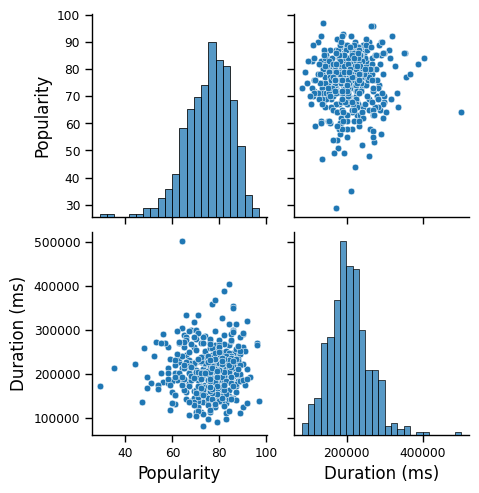

In [214]:
sns.pairplot(df[numerical_columns],palette = 'pastel')
plt.show()

9) **Does the duration of tracks vary significantly across different artists?Explore this visually using a box plot or violin plot**

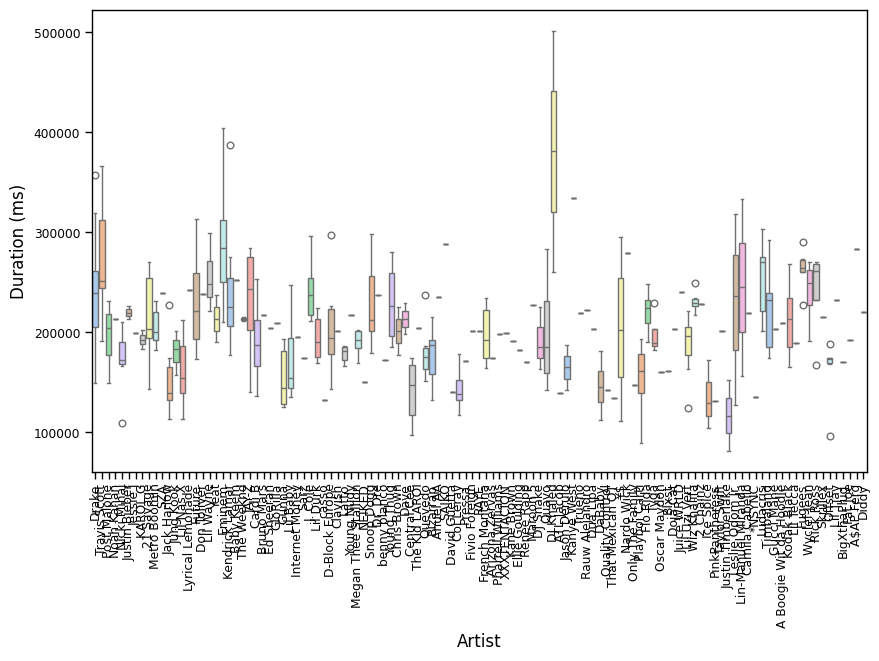

In [215]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Artist',y = 'Duration (ms)',data = df, palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()

10) **How does the distribution of track popularity vary for diffrent artists?visualise this using a swarm plot or a violin plot?**

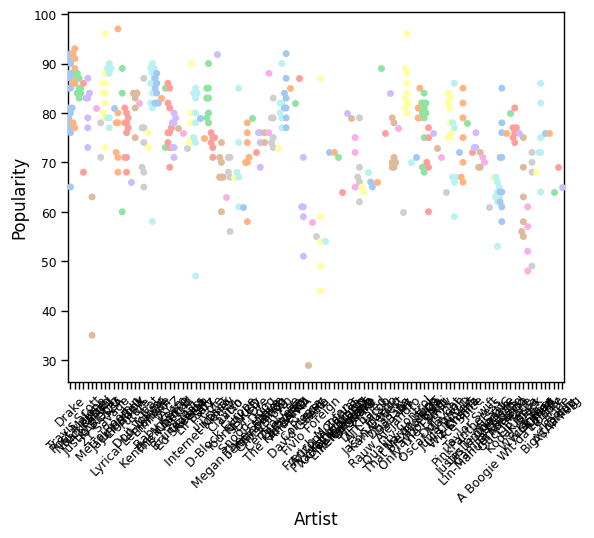

In [216]:
sns.swarmplot(x = 'Artist',y = 'Popularity',data = df, palette = 'pastel')
plt.xticks(rotation = 45)
plt.show()